[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Deep_Learning_Finanzas/blob/main/Semana04/Conditional_Score_Diffusion_Models.ipynb)

# Datos

Es el consumo de electricidad por hora de 370 clientes

https://archive.ics.uci.edu/ml/datasets/ElectricityLoadDiagrams20112014

# Idea General:

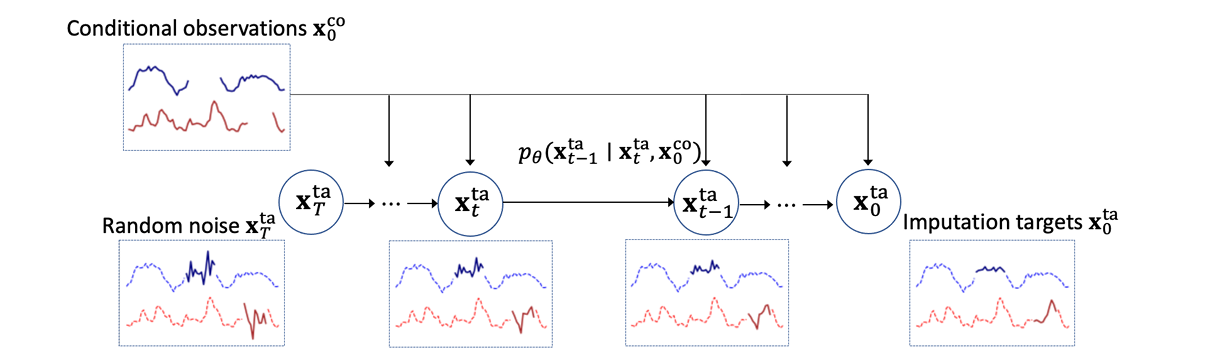

# Preparación de entorno

Los módulos incluidos en el requirements son:

- torch

- pandas

- numpy

- tqdm

- pyyaml

- matplotlib

- wget

- linear_attention_transformer


In [ ]:
!git clone https://github.com/ermongroup/CSDI.git

Cloning into 'CSDI'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 49 (delta 15), reused 4 (delta 4), pack-reused 22 (from 1)
Receiving objects: 100% (49/49), 2.56 MiB | 8.64 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [ ]:
%cd CSDI

/content/CSDI


In [ ]:
import torch
print(torch.cuda.is_available())

False


In [ ]:
import sys
sys.path.append('/content/CSDI')

In [ ]:
!pip install linear-attention-transformer

  Using cached linear_attention_transformer-0.19.1-py3-none-any.whl.metadata (787 bytes)
  Using cached axial_positional_embedding-0.3.12-py3-none-any.whl.metadata (4.3 kB)
  Using cached linformer-0.2.3-py3-none-any.whl.metadata (602 bytes)
  Using cached local_attention-1.11.1-py3-none-any.whl.metadata (907 bytes)
  Using cached product_key_memory-0.2.11-py3-none-any.whl.metadata (717 bytes)
  Using cached CoLT5_attention-0.11.1-py3-none-any.whl.metadata (737 bytes)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1

# Algoritmo:

Recibe estos datos:

Series de tiempo:
$$\textbf{X} = \{ x_{1:K, 1:L} \} \in\mathbb{R}^{K\times L} $$

Máscara de observación:
$$\textbf{M} = \{ m_{1:K, 1:L} \} \in \{ 0,1 \}^{K\times L}$$

Índice temporal:
$$ \textbf{s} = \{ s_{1:L} \} \in \mathbb{R}^{L} $$

In [ ]:
import pickle

# Ruta del archivo .pkl
ruta = '/content/CSDI/data/electricity_nips/data.pkl'

# Abrir y cargar el archivo
with open(ruta, 'rb') as f:
    datos = pickle.load(f)

# Ahora puedes usar los datos
print(type(datos))
print(datos)

<class 'list'>
[array([[  0.        , 175.53191489,  31.99320498, ...,  90.31490015,
        114.57534247,  47.91200597],
       [  0.        , 164.89361702,  31.28539071, ...,  93.01075269,
        120.74657534,  46.23415362],
       [  0.        , 154.78723404,  31.56851642, ...,  90.3187404 ,
        126.23287671,  47.53914989],
       ...,
       [ 84.67741935, 140.42553191,  61.86296716, ..., 155.2688172 ,
        232.90753425, 107.94183445],
       [ 61.05990783, 127.65957447,  41.7610419 , ..., 146.81643625,
        144.73972603,  79.97762864],
       [ 47.81105991, 114.36170213,  40.20385051, ..., 125.67588326,
        143.02739726,  66.92766592]]), array([[0., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])]


In [ ]:
import numpy as np
np.isnan(datos[0]).any()

np.False_

In [ ]:
datos[0].shape

(6001, 370)

# Ejecución del algoritmo CSDI:

(Conditional Score-based Diffusion Models for Probabilistic Time Series Imputation)

Ejemplo para cambiar algun valor del archivo "config", que en este caso se llama "base_forecasting.yaml":

In [ ]:
import yaml
with open('config/base_forecasting.yaml', 'r') as file:
    config = yaml.safe_load(file)

In [ ]:
config

{'train': {'epochs': 100,
  'batch_size': 8,
  'lr': 0.001,
  'itr_per_epoch': 100000000.0},
 'diffusion': {'layers': 4,
  'channels': 64,
  'nheads': 8,
  'diffusion_embedding_dim': 128,
  'beta_start': 0.0001,
  'beta_end': 0.5,
  'num_steps': 50,
  'schedule': 'quad',
  'is_linear': True},
 'model': {'is_unconditional': 0,
  'timeemb': 128,
  'featureemb': 16,
  'target_strategy': 'test',
  'num_sample_features': 64}}

In [ ]:
config['train']['epochs'] = 3

In [ ]:
with open('config/base_forecasting.yaml', 'w') as file:
    yaml.dump(config, file)

In [ ]:
!python exe_forecasting.py --datatype electricity --nsample 1000 --device cpu #--modelfolder forecasting_electricity_20250429_234010

Namespace(config='base_forecasting.yaml', datatype='electricity', device='cpu', seed=1, unconditional=False, modelfolder='', nsample=1000)
{
    "diffusion": {
        "beta_end": 0.5,
        "beta_start": 0.0001,
        "channels": 64,
        "diffusion_embedding_dim": 128,
        "is_linear": true,
        "layers": 4,
        "nheads": 8,
        "num_steps": 50,
        "schedule": "quad"
    },
    "model": {
        "featureemb": 16,
        "is_unconditional": false,
        "num_sample_features": 64,
        "target_strategy": "test",
        "timeemb": 128
    },
    "train": {
        "batch_size": 8,
        "epochs": 3,
        "itr_per_epoch": 100000000.0,
        "lr": 0.001
    }
}
model folder: ./save/forecasting_electricity_20250429_234010/
 17% 116/691 [27:06<2:14:21, 14.02s/it, avg_epoch_loss=0.417, epoch=0]
Traceback (most recent call last):
  File "/content/CSDI/exe_forecasting.py", line 51, in <module>
    train(
  File "/content/CSDI/utils.py", line 34, in tr

Posible ejemplo de datos de entrada del modelo

In [ ]:
import pandas as pd
pd.DataFrame({'col_1': [1,4,np.nan], 'col_2': [2,np.nan,np.nan]})


,col_1,col_2
0,1.0,2.0
1,4.0,NaN
2,NaN,NaN


In [ ]:
pd.DataFrame({'col_1': [1,1,0], 'col_2': [1,0,0]})

,col_1,col_2
0,1,1
1,1,0
2,0,0


# Resumen del algoritmo

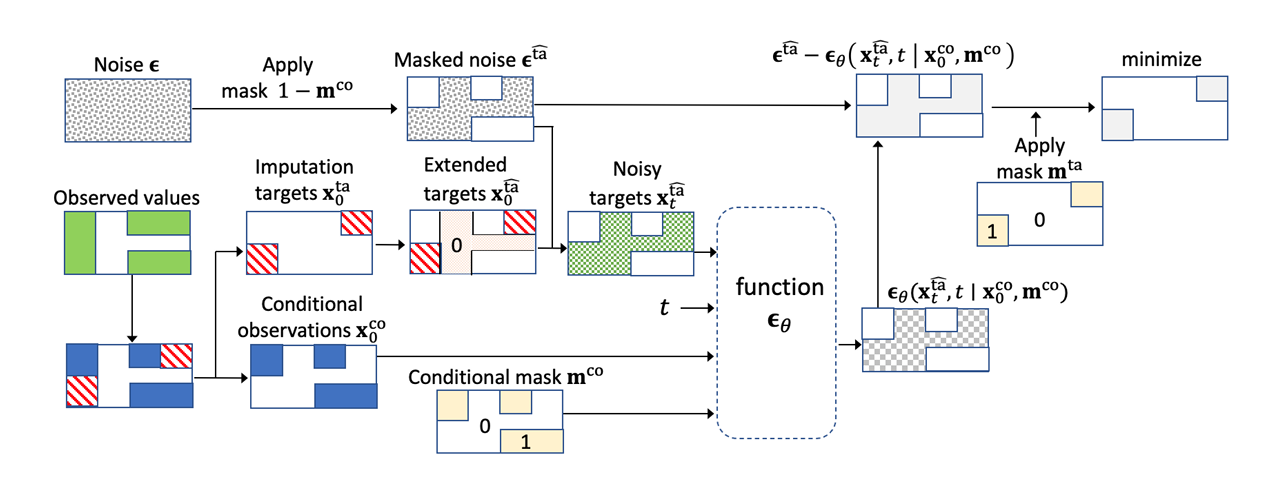

Proceso hacia adelante:

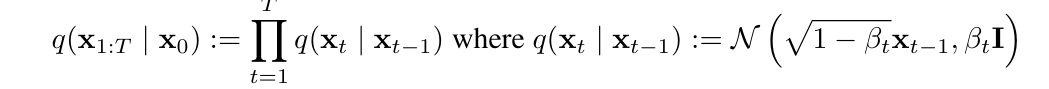

Proceso hacia atras:

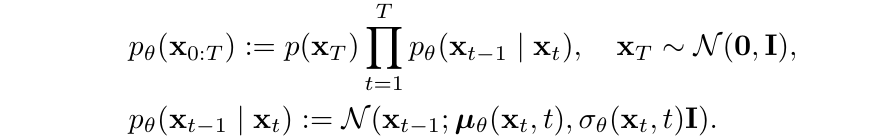

Arriba está el proceso de regreso, que se intenta resolver con una difusión que me ayude a quitar el ruido, dada por parámetros:

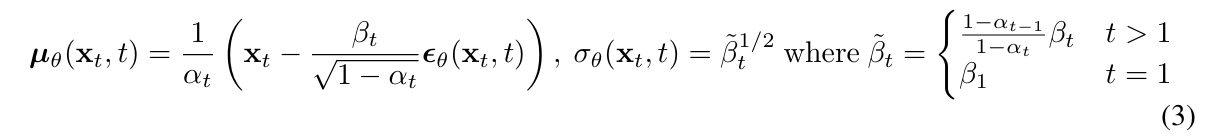

# Función de pérdida especial
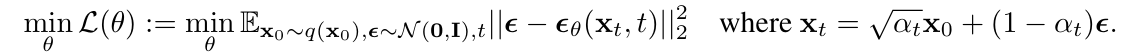

# Estructura completa de la red

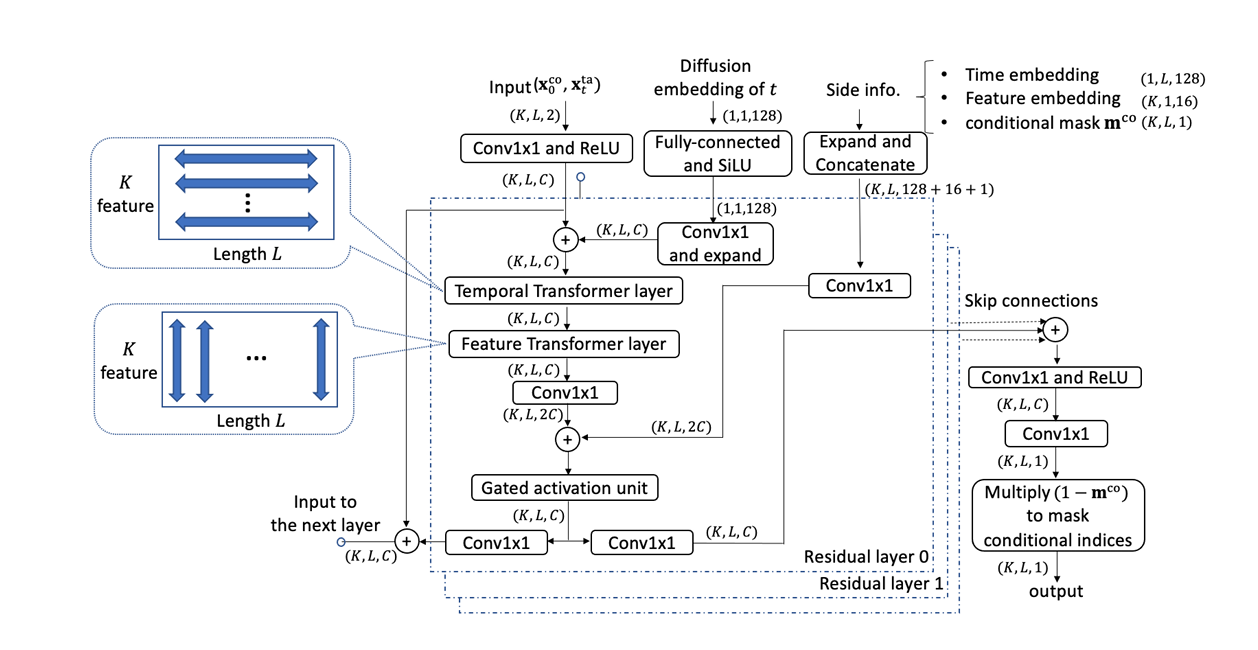

# Detalles:

Lo mas importante son los archivos:

diff_models: Donde se crea la estructura del modelo

exe_forecasting: donde se manda hacer el entrenamiento o la carga de un modelo preentrnado

main_model: La estructura general que comparten varios de los modelos

# Visualización:

Despues de entrenar un modelo y que se tenga un archivo "pth" con lo necesario, se puede ejecutar código parecido al del notebook:

**visualize_example.ipynb**

# Referencias

[Código](https://github.com/ermongroup/CSDI)

[Paper](https://arxiv.org/abs/2107.03502)